# Load Boston Housing Dataset

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population

In [1]:
import numpy as np
from keras.datasets import boston_housing

[X_boston, y_boston], _ = boston_housing.load_data()
X_boston = (X_boston - X_boston.mean(axis=0)) / X_boston.std(axis=0)
y_boston = (y_boston - y_boston.mean()) / y_boston.std()
y_boston = np.expand_dims(y_boston, axis=-1)

X_boston.shape, y_boston.shape

Using TensorFlow backend.


((404, 13), (404, 1))

# Plot Feature Correlations

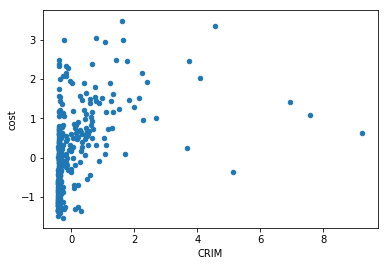

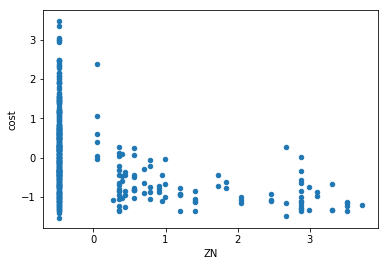

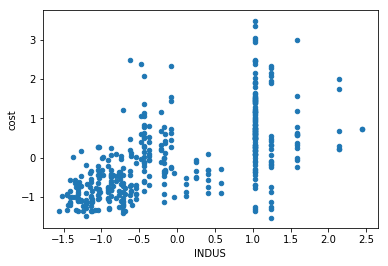

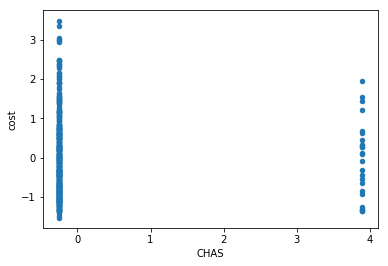

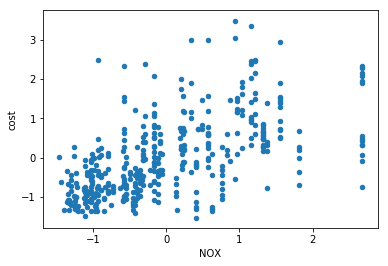

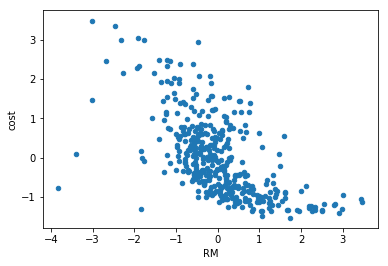

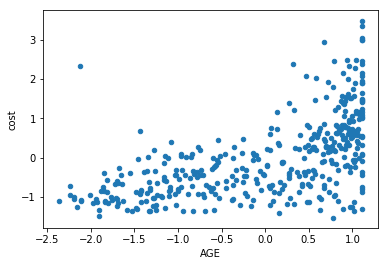

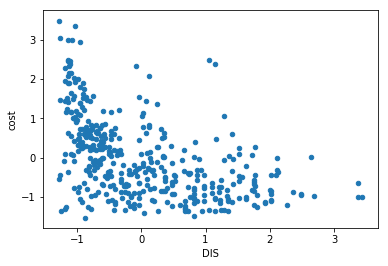

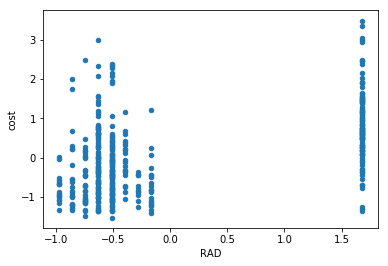

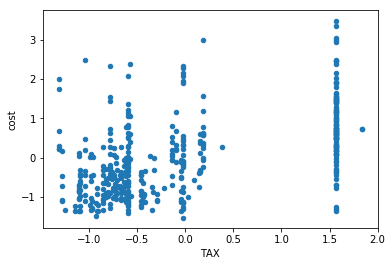

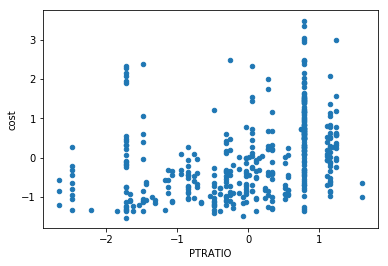

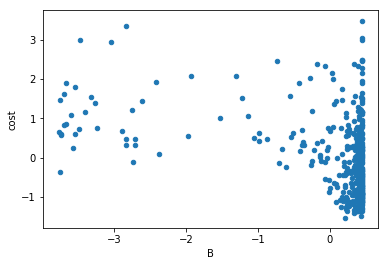

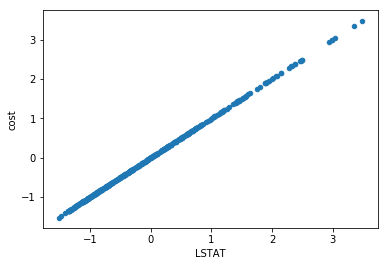

In [2]:
import pandas as pd
%matplotlib inline

nb_feature = X_boston.shape[-1]
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for i, feature in zip(range(nb_feature), features):
    pd.DataFrame({feature: X_boston[:, i], 'cost': y_boston[:, 0]}).plot(kind='scatter', x=feature, y='cost')

# Define Model

In [3]:
import tensorflow as tf

X = tf.placeholder(dtype=tf.float32, shape=[None, 13], name='X')
y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='y')
W = tf.Variable(initial_value=tf.zeros(shape=[13, 1]), name='W')
b = tf.Variable(initial_value=tf.zeros(shape=[1]), name='b')
z = tf.matmul(X, W, name='z')
y_pred = tf.add(z, b, name='y_pred')
r = tf.subtract(y_pred, y, name='r')
losses = tf.square(r, name='losses')    
loss = tf.reduce_mean(losses, name='loss')

# Add Summary Tensor

To visualize the loss over time, we will attach a TensorFlow [summary op](https://www.tensorflow.org/api_guides/python/summary) to the loss. This will allow us to visualize how the loss changes over time with TensorBoard.

In [4]:
loss_summary = tf.summary.scalar(name='loss_summary', tensor=loss)

# Add SGD Optimizer

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01, name='Optimizer')

sgd_step = optimizer.minimize(loss, name='SGDStep')

# Initialize Variables

In [7]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

# SGD Steps

Notice here that in addition to specifying the `sgd_step` tensor, we also specify we want to execute the `loss_summary` tensor, which returns summary information which we can pass to `writer.add_summary()` to log the value of the loss during training.

In [8]:
%%time

writer = tf.summary.FileWriter("tensorboard/LR with Loss Summary", sess.graph)
for i in range(20):
    ls, _ = sess.run([loss_summary, sgd_step], feed_dict={X: X_boston, y: y_boston})
    writer.add_summary(ls, global_step=i)

writer.flush()

CPU times: user 144 ms, sys: 7.56 ms, total: 151 ms
Wall time: 150 ms
